# ECOM Customer Engagement

In [846]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [847]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [848]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn import metrics

In [849]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

# getting data

In [850]:
data = pd.read_csv("ecom.csv")

In [851]:
data.head()

,customerID,nickname,Delivery,Price,Website,productQuality,Loyalty,Security,customerService,churn
0,1,peter,VERY BAD,BAD,VERY BAD,BAD,HIGH,VERY BAD,GOOD,YES
1,2,sam,BAD,VERY GOOD,VERY GOOD,BAD,LOW,GOOD,GOOD,NO
2,3,john,VERY GOOD,VERY GOOD,BAD,VERY GOOD,MEDIUM,VERY GOOD,BAD,NO
3,4,tom,GOOD,BAD,VERY BAD,GOOD,MEDIUM,GOOD,VERY GOOD,YES
4,5,susan,BAD,VERY GOOD,GOOD,GOOD,LOW,VERY GOOD,BAD,NO


In [852]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       23 non-null     int64 
 1   nickname         23 non-null     object
 2   Delivery         23 non-null     object
 3   Price            23 non-null     object
 4   Website          23 non-null     object
 5   productQuality   23 non-null     object
 6   Loyalty          23 non-null     object
 7   Security         23 non-null     object
 8   customerService  23 non-null     object
 9   churn            23 non-null     object
dtypes: int64(1), object(9)
memory usage: 1.9+ KB


In [853]:
data.Delivery.value_counts()

BAD          8
GOOD         7
VERY GOOD    5
VERY BAD     3
Name: Delivery, dtype: int64

In [854]:
X = data.drop(['customerID','nickname'],axis=1)

In [855]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Delivery         23 non-null     object
 1   Price            23 non-null     object
 2   Website          23 non-null     object
 3   productQuality   23 non-null     object
 4   Loyalty          23 non-null     object
 5   Security         23 non-null     object
 6   customerService  23 non-null     object
 7   churn            23 non-null     object
dtypes: object(8)
memory usage: 1.6+ KB


In [856]:
print(X)

     Delivery      Price    Website productQuality Loyalty   Security  \
0    VERY BAD        BAD   VERY BAD            BAD    HIGH   VERY BAD   
1         BAD  VERY GOOD  VERY GOOD            BAD     LOW       GOOD   
2   VERY GOOD  VERY GOOD        BAD      VERY GOOD  MEDIUM  VERY GOOD   
3        GOOD        BAD   VERY BAD           GOOD  MEDIUM       GOOD   
4         BAD  VERY GOOD       GOOD           GOOD     LOW  VERY GOOD   
5        GOOD        BAD   VERY BAD      VERY GOOD     LOW        BAD   
6    VERY BAD   VERY BAD       GOOD           GOOD    HIGH        BAD   
7   VERY GOOD        BAD       GOOD            BAD     LOW  VERY GOOD   
8        GOOD        BAD        BAD           GOOD  MEDIUM        BAD   
9   VERY GOOD       GOOD   VERY BAD       VERY BAD    HIGH   VERY BAD   
10       GOOD  VERY GOOD   VERY BAD           GOOD     LOW  VERY GOOD   
11        BAD        BAD       GOOD           GOOD  MEDIUM        BAD   
12        BAD       GOOD       GOOD      VERY GOOD 

In [857]:
target = X.loc[:,"churn"]
features = X.loc[:,"Delivery":"customerService"]
features
features.Delivery = features.Delivery.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
features.Price = features.Price.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
features.Website = features.Website.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
features.productQuality = features.productQuality.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
features.Loyalty = features.Loyalty.map({"LOW":1,"MEDIUM":2,"HIGH":3})
features.Security = features.Security.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
features.customerService = features.customerService.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})

target = target.map({"YES":1,"NO":0})
print(target)

0     1
1     0
2     0
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    0
17    0
18    1
19    0
20    1
21    0
22    1
Name: churn, dtype: int64


In [858]:
A = features
b = target
P = A
print(P)

    Delivery  Price  Website  productQuality  Loyalty  Security  \
0          1      2        1               2        3         1   
1          2      4        4               2        1         3   
2          4      4        2               4        2         4   
3          3      2        1               3        2         3   
4          2      4        3               3        1         4   
5          3      2        1               4        1         2   
6          1      1        3               3        3         2   
7          4      2        3               2        1         4   
8          3      2        2               3        2         2   
9          4      3        1               1        3         1   
10         3      4        1               3        1         4   
11         2      2        3               3        2         2   
12         2      3        3               4        1         3   
13         2      2        4               3        3         

In [859]:
P_train, P_test, b_train, b_test = train_test_split(P, b, test_size=0.3, random_state=1) # 70% training and 30% test


In [860]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# apply random over-sampling to the training data
ros = RandomOverSampler(random_state=1)
P_train_resampled, b_train_resampled = ros.fit_resample(P_train, b_train)

# apply random under-sampling to the training data
rus = RandomUnderSampler(random_state=1)
P_train_resampled, b_train_resampled = rus.fit_resample(P_train, b_train)

In [861]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the dataset
clf.fit(P_train, b_train)

# Predict the class of the test data
b_pred = clf.predict(P_test)

print("Accuracy:",metrics.accuracy_score(b_test, b_pred))

print(b_pred)

Accuracy: 0.7142857142857143
[0 0 1 0 0 0 0]


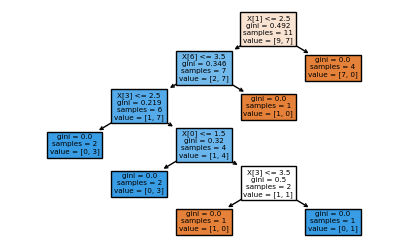

In [880]:
tree = clf.estimators_[5]

# Plot the tree
plt.figure(figsize=(5, 3))
plot_tree(tree, filled=True)
plt.show()

Text(0.5, 1.0, 'Impact of each feature on customer churn')

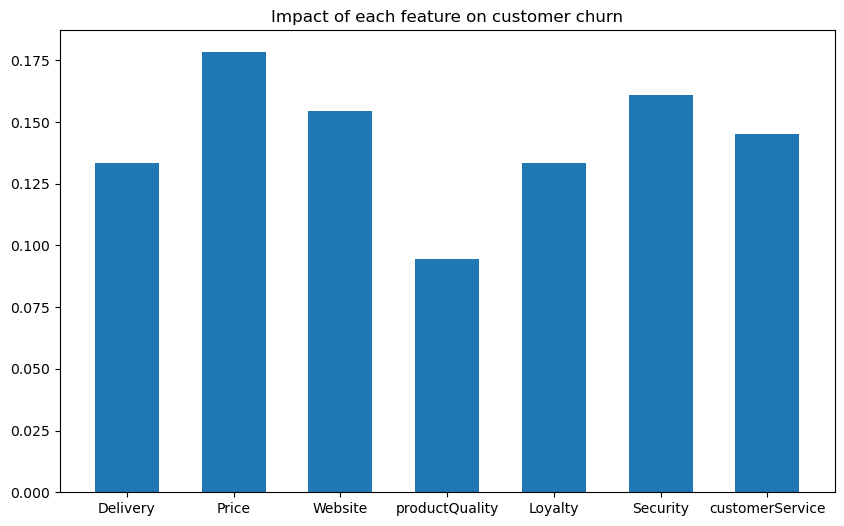

In [896]:
importances = clf.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(range(P.shape[1]), importances, width = 0.6)
plt.xticks(range(P.shape[1]), ['Delivery','Price','Website','productQuality','Loyalty','Security','customerService'])

plt.title("Impact of each feature on customer churn")

In [864]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(P_train, b_train)

b_pred = rfr.predict(P_test)

mse = mean_squared_error(b_test, b_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.24697142857142856


In [865]:
import gspread

In [866]:
#https://docs.google.com/spreadsheets/d/1VSxw_y84rm-bkCAFom74d-syRp0QU46agocJKrflUQM/edit#gid=31856741
    
sheet_id = '1VSxw_y84rm-bkCAFom74d-syRp0QU46agocJKrflUQM'
xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
sheet_1 = pd.read_excel(xls,'sheet',header=0)

sheet_1

,Timestamp,Enter customer ID:,Enter your name:,Rate your experience with Delivery.,Rate your experience with Price.,Rate your experience with Website.,Rate your experience with product quality.,What are the chances you would come back for shopping with us?,Rate your experience with Security.,Rate your experience with customer service.
0,2023-04-02 22:50:59.676,28,aach,BAD,GOOD,BAD,GOOD,MEDIUM,BAD,VERY GOOD
1,2023-04-03 13:33:42.270,29,mads,VERY BAD,BAD,GOOD,VERY GOOD,LOW,BAD,GOOD
2,2023-04-03 16:19:13.617,75,aaru,VERY BAD,VERY BAD,BAD,VERY BAD,LOW,BAD,BAD


In [867]:
customer = sheet_1.loc[:,"Enter customer ID:":"Enter your name:"]
customer.rename(columns = {'Enter customer ID:': 'customerID'}, inplace = True)
customer.rename(columns = {'Enter your name:': 'nickname'}, inplace = True)
customer

,customerID,nickname
0,28,aach
1,29,mads
2,75,aaru


In [868]:

ts = sheet_1.drop(['Timestamp','Enter customer ID:','Enter your name:'],axis=1)
ts.rename(columns = {'Rate your experience with Delivery.': 'Delivery'}, inplace = True)
ts.rename(columns = {'Rate your experience with Price.': 'Price'}, inplace = True)
ts.rename(columns = {'Rate your experience with Website.': 'Website'}, inplace = True)
ts.rename(columns = {'Rate your experience with product quality.': 'productQuality'}, inplace = True)
ts.rename(columns = {'Rate your experience with Security.': 'Security'}, inplace = True)
ts.rename(columns = {'Rate your experience with customer service.': 'customerService'}, inplace = True)
ts.rename(columns = {'What are the chances you would come back for shopping with us?': 'Loyalty'}, inplace = True)
ts


,Delivery,Price,Website,productQuality,Loyalty,Security,customerService
0,BAD,GOOD,BAD,GOOD,MEDIUM,BAD,VERY GOOD
1,VERY BAD,BAD,GOOD,VERY GOOD,LOW,BAD,GOOD
2,VERY BAD,VERY BAD,BAD,VERY BAD,LOW,BAD,BAD


In [869]:
ts.Delivery = ts.Delivery.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
ts.Price = ts.Price.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
ts.Website = ts.Website.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
ts.productQuality = ts.productQuality.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
ts.Loyalty = ts.Loyalty.map({"LOW":1,"MEDIUM":2,"HIGH":3})
ts.Security = ts.Security.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
ts.customerService = ts.customerService.map({"VERY BAD":1,"BAD":2,"GOOD":3,"VERY GOOD":4})
ts

,Delivery,Price,Website,productQuality,Loyalty,Security,customerService
0,2,3,2,3,2,2,4
1,1,2,3,4,1,2,3
2,1,1,2,1,1,2,2


In [870]:
ts
length = len(ts)
ts
length

3

In [871]:
ts_pred = clf.predict(ts)
import colorama
from colorama import Fore


for i in range (0,length):
    if ts_pred[i] == 0:
        churn = "WILL NOT"
        print("Customer:",customer.iloc[i]['nickname'],"with customer ID:",customer.iloc[i]['customerID'],'\033[1m' + Fore.GREEN + churn + '\033[0m',"churn.")
    elif ts_pred[i] == 1:
        churn = "WILL"
        print("Customer:",customer.iloc[i]['nickname'],"with customer ID:",customer.iloc[i]['customerID'],'\033[1m' + Fore.RED + churn + '\033[0m',"churn.")
    

Customer: aach with customer ID: 28 WILL NOT churn.
Customer: mads with customer ID: 29 WILL churn.
Customer: aaru with customer ID: 75 WILL churn.
